In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.rcParams['figure.figsize'] = (12,10)

In [11]:
def getPF(xs,ys,xlim=None,ylim=None):
    xs = np.array(xs)
    ys = np.array(ys)
    
    order = np.argsort(xs)
    
    xs = xs[order]
    ys = ys[order]
    
    cur_max = -1
    for i in range(ys.shape[0]):
        if ys[i] > cur_max:
            cur_max = ys[i]
        ys[i] = cur_max
    
    start = 0
    if xlim is not None or ylim is not None:
        for i in range(len(xs)):
            if xlim is not None and (xs[i]>xlim[1] or xs[i]<xlim[0]):
                start += 1
                continue
            if ylim is not None and (ys[i]>ylim[1] or ys[i]<ylim[0]):
                #start += 1
                pass
    
    return xs[start:],ys[start:]

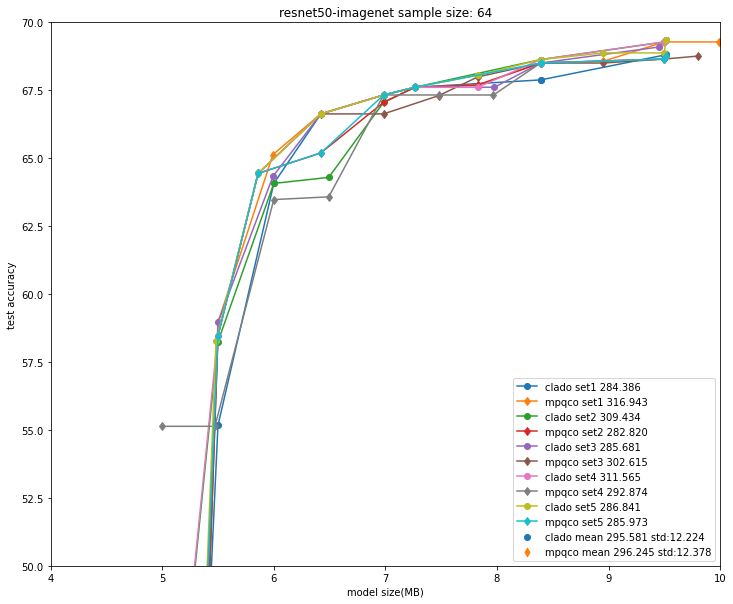

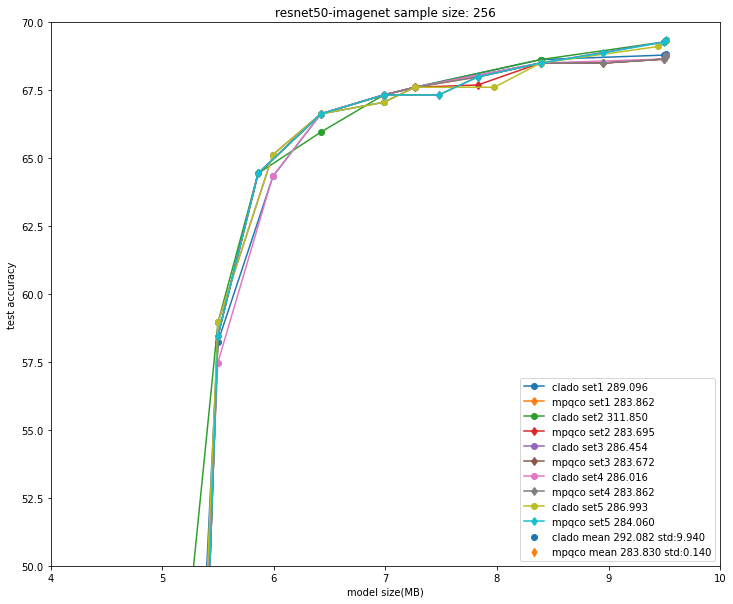

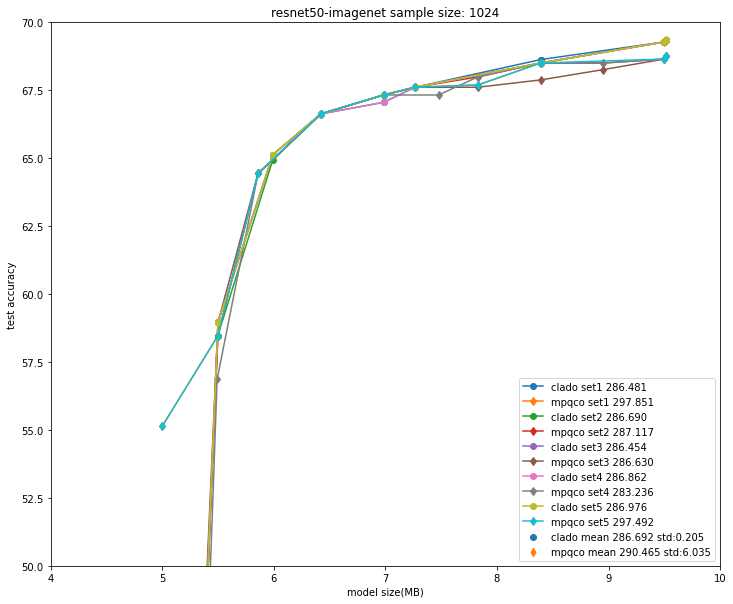

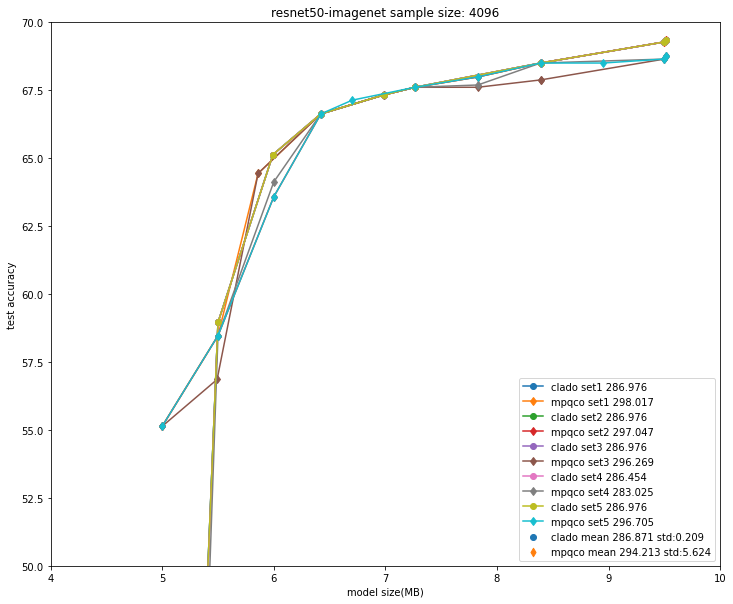

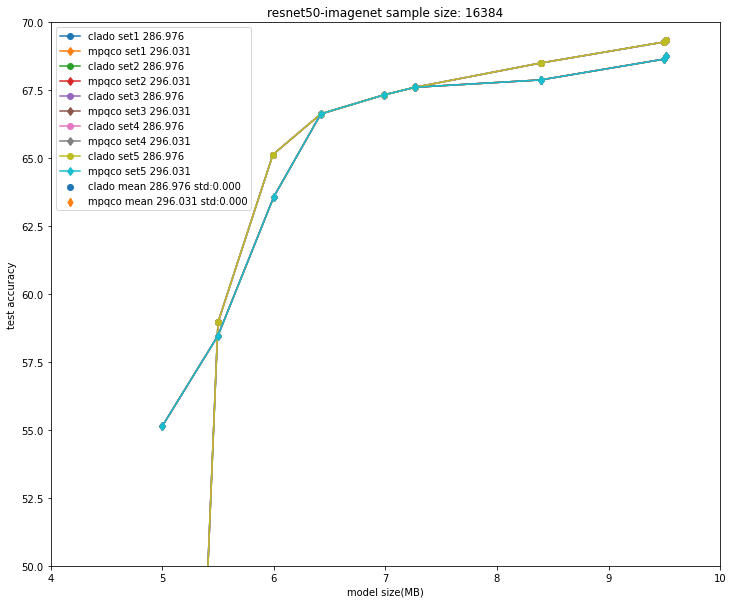

In [13]:
xlim,ylim = [4,10],[50,70]
#xlim,ylim = None,None
for b in (1,4,16,64,256):
    
    plt.clf()
    
    auc_clado = []
    auc_mpqco = []
    auc_naive = []
    
    for sid in range(5):
        with open(f'Ltilde_resnet18/res_{b}batches(size64)_sid{sid}.pkl','rb') as f:
            res = pickle.load(f)

        clado_perf = [res['clado_perf'][i]['top1'].item() for i in range(len(res['clado_perf']))]

        naive_perf = [res['naive_perf'][i]['top1'].item() for i in range(len(res['naive_perf']))]
        mpqco_perf = [res['mpqco_perf'][i]['top1'].item() for i in range(len(res['mpqco_perf']))]

        plt.rcParams['figure.figsize'] = (12,10)
        
        x,y = res['clado_size'],clado_perf
        x,y = getPF(x,y,xlim=xlim,ylim=ylim)
#         x = np.concatenate([x,np.array([20])])
#         y = np.concatenate([y,y[-1:]])
#         auc_clado.append(y.mean())
        auc_clado.append(auc(x,y))
        plt.plot(x,y,marker='o',label=f'clado set{sid+1} {auc(x,y):.3f}')
        
        x,y = res['naive_size'],naive_perf
        x,y = getPF(x,y,xlim=xlim,ylim=ylim)
#         x = np.concatenate([x,np.array([20])])
#         y = np.concatenate([y,y[-1:]])
#         auc_naive.append(y.mean())
        auc_naive.append(auc(x,y))
        #plt.plot(x,y,marker='x',label=f'naive set{sid+1} {auc(x,y):.3f}')
        
        x,y = res['mpqco_size'],mpqco_perf
        x,y = getPF(x,y,xlim=xlim,ylim=ylim)
#         x = np.concatenate([x,np.array([20])])
#         y = np.concatenate([y,y[-1:]])
#         auc_mpqco.append(y.mean())
        auc_mpqco.append(auc(x,y))
        plt.plot(x,y,marker='d',label=f'mpqco set{sid+1} {auc(x,y):.3f}')
        
    
    plt.scatter([],[],marker='o',label=f'clado mean {np.array(auc_clado).mean():.3f} std:{np.array(auc_clado).std():.3f}')
    #plt.scatter([],[],marker='x',label=f'naive mean {np.array(auc_naive).mean():.3f} std:{np.array(auc_naive).std():.3f}')
    plt.scatter([],[],marker='d',label=f'mpqco mean {np.array(auc_mpqco).mean():.3f} std:{np.array(auc_mpqco).std():.3f}')
    plt.legend()
    plt.xlabel('model size(MB)')
    plt.ylabel('test accuracy')
    plt.title(f'resnet50-imagenet sample size: {b*64}')
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    #plt.savefig(f'r50_{b*64}samples_2c_tail.pdf',transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()
        

In [ ]:
np.array(clado_perf).mean(),np.array(naive_perf).mean()

In [ ]:
clado_perf,naive_perf

In [ ]:
xlim,ylim = [0.16,0.26],[64,69]
xlim,ylim = None,None
for b in (1,2,4,8,16,32,64,98):
    plt.clf()
    auc_clado = []
    #auc_mpqco = []
    auc_naive = []
    if not b==98:
        sid_range = 5
    else:
        sid_range = 1
    for sid in range(sid_range):
        with open(f'../CIFAR100/{b}batches_sid{sid}.pkl','rb') as f:
            res = pickle.load(f)

        clado_perf = [res['clado_perf'][i]['top1'].item() for i in range(len(res['clado_perf']))]

        naive_perf = [res['naive_perf'][i]['top1'].item() for i in range(len(res['naive_perf']))]
        #mpqco_perf = [res['mpqco_perf'][i]['top1'].item() for i in range(len(res['mpqco_perf']))]

        plt.rcParams['figure.figsize'] = (12,10)
        
        x,y = getPF(res['clado_size'],clado_perf,xlim=xlim,ylim=ylim)
        x = np.concatenate([x,np.array([0.26])])
        y = np.concatenate([y,y[-1:]])
        metric = auc(x,y)
        auc_clado.append(metric)
        plt.plot(x,y,marker='o',label=f'clado set{sid+1} AUC({metric:.3f})')
        
        x,y = getPF(res['naive_size'],naive_perf,xlim=xlim,ylim=ylim)
        x = np.concatenate([x,np.array([0.26])])
        y = np.concatenate([y,y[-1:]])
        metric = auc(x,y)
        auc_naive.append(metric)
        plt.plot(x,y,marker='x',label=f'naive set{sid+1} AUC({metric:.3f})')
        
        #x,y = getPF(res['mpqco_size'],mpqco_perf)
        #plt.plot(x,y,marker='d',label=f'mpqco set{sid}')
        
    plt.scatter([],[],marker='o',label=f'clado auc mean:{np.array(auc_clado).mean():.3f} std:{np.array(auc_clado).std():.3f}')
    plt.scatter([],[],marker='x',label=f'naive auc mean:{np.array(auc_naive).mean():.3f} std:{np.array(auc_naive).std():.3f}')
    #plt.scatter([],[],label=f'mpqco avg auc {np.array(auc_mpqco).mean()}')
    plt.legend()
    plt.xlabel('model size(MB)')
    plt.ylabel('test accuracy')
    plt.title(f'resnet20-cifar100 sample size: {b*512 if not b==98 else 50000}')
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.savefig(f'r20_{b*512 if not b==98 else 50000}samples.pdf',transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()

In [ ]:
import pickle,torch
import numpy as np

In [ ]:
for i in range(10):
    
    with open(f'Ltilde_resnet50/Ltilde_batch{i}(size64)_[(8, 2), (8, 4), (8, 8)]i1k_resnet50.pkl_T41','rb') as f:
        res_t41 = pickle.load(f)
    with open(f'Ltilde_resnet50/Ltilde_batch{i}(size64)_[(8, 2), (8, 4), (8, 8)]i1k_resnet50.pkl_T42','rb') as f:
        res_t42 = pickle.load(f)
    with open(f'Ltilde_resnet50/Ltilde_batch{i}(size64)_[(8, 2), (8, 4), (8, 8)]i1k_resnet50.pkl_v100','rb') as f:
        res_v100 = pickle.load(f)
    
    diff_t4 = np.abs(res_t41['Ltilde'] - res_t42['Ltilde']).mean()
    diff_v100 = np.abs(res_t41['Ltilde'] - res_v100['Ltilde']).mean()
    
    print(f'diff_t4 {diff_t4} diff_v100 {diff_v100}')

In [ ]:
i,j = 3,1
with open(f'Ltilde_resnet50/Ltilde_batch{i}(size64)_[(8, 2), (8, 4), (8, 8)]i1k_resnet50.pkl_T41','rb') as f:
    res_1 = pickle.load(f)
with open(f'Ltilde_resnet50/Ltilde_batch{j}(size64)_[(8, 2), (8, 4), (8, 8)]i1k_resnet50.pkl_T41','rb') as f:
    res_2 = pickle.load(f)
np.abs(res_1['Ltilde'] - res_2['Ltilde']).mean()